<a href="https://colab.research.google.com/github/jnrahul92/NLP_IN_ACTION_BOOK/blob/main/NLP_with_transformers_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets
from datasets import list_datasets

In [3]:
all_datasets = list_datasets()

<ipython-input-3-f6f3a82aff2d>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
print(len(all_datasets))
all_datasets[:10]

120496


['acronym_identification',
 'ade_corpus_v2',
 'UCLNLP/adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'allenai/ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews']

In [4]:
from datasets import load_dataset

In [51]:
emotions = load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [52]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [ ]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [ ]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [8]:
import pandas as pd

In [ ]:
emotions.set_format(type="pandas")

In [ ]:
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [98]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [ ]:
df["label_name"] = df["label"].apply(label_int2str)

In [ ]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
import matplotlib.pyplot as plt

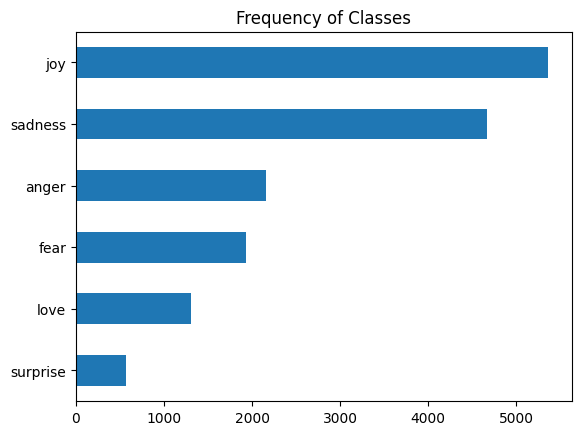

In [ ]:
df["label_name"].value_counts(ascending = True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

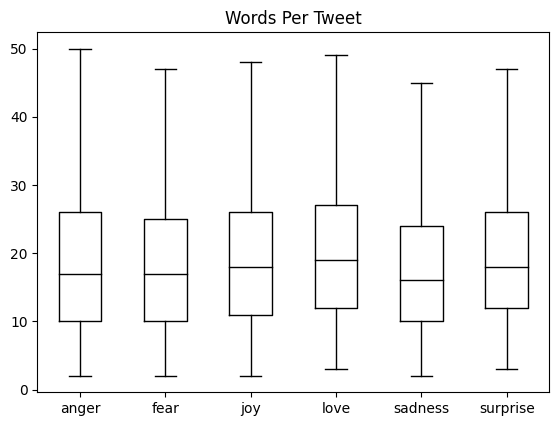

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet",by="label_name",grid = False, showfliers = False, color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [46]:
emotions.reset_format()

In [53]:
from transformers import AutoTokenizer

In [54]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [55]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [57]:
text = "Tokenizing text is a core task of NLP."

In [58]:
encoded_text = tokenizer(text)

In [ ]:
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [ ]:
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [59]:
def tokenize(batch):
  return tokenizer(batch["text"],padding = True, truncation = True)

In [ ]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [60]:
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [61]:
print(emotions_encoded["train"].column_names)

In [49]:
from transformers import AutoModel

In [62]:
import torch
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [63]:
import torch.nn.functional as F
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [ ]:
text = "this is a test"
inputs = tokenizer(text, return_tensors = "pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}

In [ ]:
with torch.no_grad():
  outputs = model(**inputs)

In [ ]:
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [ ]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [12]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {"hidden_state":last_hidden_state[:,0].cpu().numpy()}

In [64]:
emotions_encoded.set_format("torch",columns = ["input_ids","attention_mask","label"])

In [65]:
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched = True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [66]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [67]:
import numpy as np

In [68]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

In [69]:
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [75]:
lr_clf.score(X_valid, y_valid)

0.6335

In [76]:
from sklearn.dummy import DummyClassifier

In [77]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [37]:
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize = "true")
  fig, ax = plt.subplots(figsize = (6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar = False)
  plt.title("Normalized confusion matrix")
  plt.show()

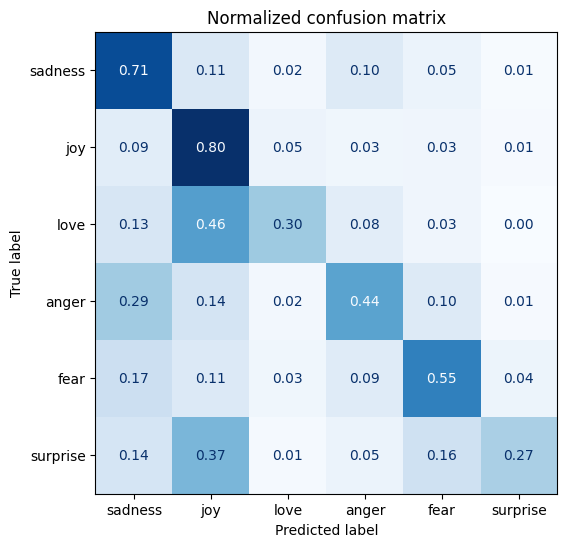

In [84]:
y_preds = lr_clf.predict(X_valid)
labels = emotions["train"].features["label"].names
plot_confusion_matrix(y_preds, y_valid, labels)

In [13]:
from transformers import AutoModelForSequenceClassification

In [14]:
num_labels = 6

In [86]:
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels)).to(device)

In [16]:
from sklearn.metrics import accuracy_score, f1_score

In [31]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average = "weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc,"f1":f1}

In [18]:
from huggingface_hub import notebook_login

In [20]:
notebook_login()

In [26]:
batch_size = 64
logging_steps = len(emotions_encoded["train"])//batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

In [27]:
from transformers import Trainer, TrainingArguments
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs = 2,
                                  learning_rate = 2e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  evaluation_strategy = "epoch",
                                  disable_tqdm = False,
                                  logging_steps = logging_steps,
                                  push_to_hub = True,
                                  log_level = "error")

In [28]:
from transformers import Trainer

In [32]:
trainer = Trainer(model = model, args=training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = emotions_encoded["train"],
                  eval_dataset = emotions_encoded["validation"],
                  tokenizer = tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
/content/distilbert-base-uncased-finetuned-emotion is already a clone of https://huggingface.co/jnrahul92/distilbert-base-uncased-finetuned-emotion. Make sure you pull the latest changes with `repo.git_pull()`.


In [79]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.115200,0.158987,0.937000,0.937308
2,0.117700,0.158987,0.937000,0.937308


TrainOutput(global_step=500, training_loss=0.11647289657592773, metrics={'train_runtime': 241.102, 'train_samples_per_second': 132.724, 'train_steps_per_second': 2.074, 'total_flos': 720342861696000.0, 'train_loss': 0.11647289657592773, 'epoch': 2.0})

In [34]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [35]:
preds_output.metrics

{'test_loss': 0.15898697078227997,
 'test_accuracy': 0.937,
 'test_f1': 0.9373075175785588,
 'test_runtime': 4.127,
 'test_samples_per_second': 484.617,
 'test_steps_per_second': 7.754}

In [36]:
import numpy as np

y_preds = np.argmax(preds_output.predictions, axis = 1)

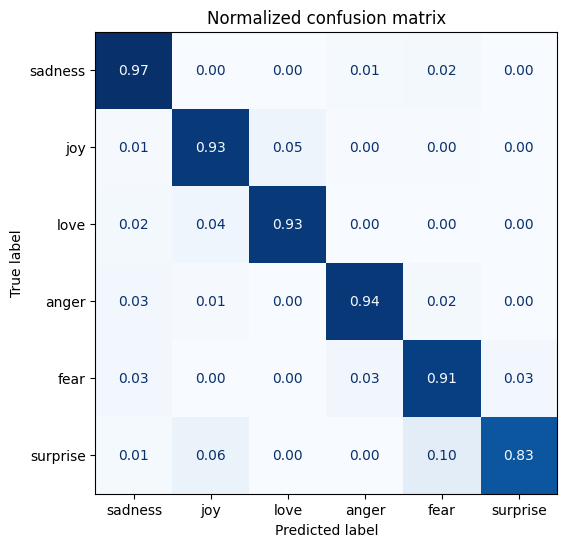

In [74]:
labels = emotions["train"].features["label"].names
import matplotlib.pyplot as plt
plot_confusion_matrix(y_preds, y_valid, labels)

In [75]:
from torch.nn.functional import cross_entropy

In [91]:
def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis = -1)
    loss = cross_entropy(output.logits, batch["label"].to(device), reduction = "none")

  return {"loss":loss.cpu().numpy(),
          "predicted_label": pred_label.cpu().numpy()}

In [92]:
emotions_encoded.set_format("torch", columns = ["input_ids","attention_mask","label"])

In [93]:
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched = True, batch_size = 16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [94]:
emotions_encoded.set_format("pandas")

In [95]:
cols = ["text","label","predicted_label","loss"]

In [96]:
df_test = emotions_encoded["validation"][:][cols]

In [99]:
df_test["label"] = df_test["label"].apply(label_int2str)

In [100]:
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [101]:
df_test.sort_values("loss", ascending = False).head(10)

,text,label,predicted_label,loss
171,id been feeling a bit funny all day verging on...,surprise,joy,2.032122
457,im still feeling a little shocked over yesterd...,surprise,joy,2.022920
499,ive never been particularly bothered about my ...,surprise,joy,2.022195
1781,i feel like im not gonna lie im really surpris...,surprise,anger,2.022124
1604,im not going to lie it feels really weird to b...,surprise,joy,2.011724
572,i didnt feel like explaining to her that im ge...,surprise,anger,2.010731
1664,id been feeling a bit curious,surprise,anger,2.010455
732,i feel less weird about soliciting guys for th...,surprise,joy,2.009731
930,i feel really amazed at times at what ive come...,surprise,anger,2.004239
583,i really did not feel so impressed with housto...,surprise,joy,2.003206


In [102]:
df_test.sort_values("loss", ascending = True).head(10)

,text,label,predicted_label,loss
205,i cannot wait for school to end so i can chang...,joy,joy,1.594330
255,ive been sitting in my wheel chair to move lau...,joy,joy,1.616413
802,i hate hate hate watching people work and me s...,joy,joy,1.617112
723,i was able to go to a st party i am back feeli...,joy,joy,1.619593
490,i have to find a few baskets for storage and p...,joy,joy,1.620952
530,i feel pretty safe but i do realize that we do...,joy,joy,1.622533
646,i wear funny cartoon t shirts of course with m...,joy,joy,1.622815
1619,i sat in the car and read my book which suited...,joy,joy,1.624246
1512,i feel that i am not valued i am under paid an...,joy,joy,1.624934
787,i nearly barfed on the day before came inside ...,joy,joy,1.625437


In [103]:
trainer.push_to_hub(commit_message = "Training completed!")

To https://huggingface.co/jnrahul92/distilbert-base-uncased-finetuned-emotion
   5ed9b93..a9154c4  main -> main

   5ed9b93..a9154c4  main -> main

To https://huggingface.co/jnrahul92/distilbert-base-uncased-finetuned-emotion
   a9154c4..6d2a8b8  main -> main

   a9154c4..6d2a8b8  main -> main



'https://huggingface.co/jnrahul92/distilbert-base-uncased-finetuned-emotion/commit/a9154c43424c594426fd32732b76246457544b0b'

In [104]:
from transformers import pipeline

In [105]:
model_id = "jnrahul92/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification",model = model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [106]:
custom_tweet = "I saw a movie today and it was really good."

In [107]:
preds = classifier(custom_tweet, return_all_scores = True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


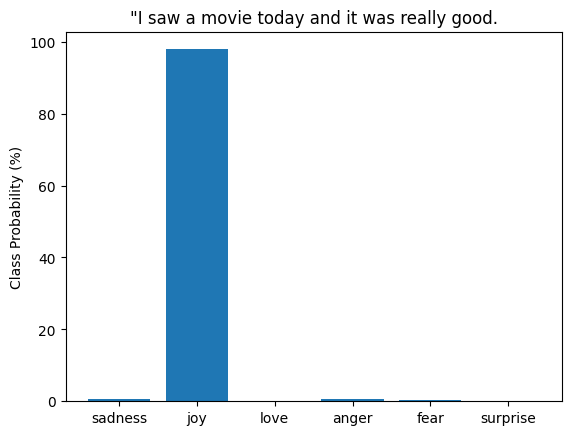

In [109]:
import pandas as pd
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df["score"],color = 'C0')
plt.title(f'"{custom_tweet}')
plt.ylabel("Class Probability (%)")
plt.show()